In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import csv

#Root of jupyter notebook is /projects/ps-gymreklab/resources/ukbiobank

In [2]:
def loadFreqs(freqLocation, identifyingVCFLocation, cNum, vcfHeaderLines):
    lociToFreqs = {}
    with open('{}/chr{}.afreq'.format(freqLocation, cNum)) as freqFile, \
            open('{}/chr{}.vcf'.format(identifyingVCFLocation, cNum)) as vcfFile:
        freqReader = csv.reader(freqFile, delimiter='\t')
        vcfReader = csv.reader(vcfFile, delimiter='\t')

        #skip header lines
        next(freqReader)
        for _ in range(vcfHeaderLines):
            next(vcfReader)


        count = 0
        for freqRow, vcfRow in zip(freqReader, vcfReader):
            count += 1
            if freqRow[1] != vcfRow[2]:
                print("Mismatched vcf and afreq IDs at variant {}".format(count))
                1/0
            variantKey = tuple(vcfRow[i] for i in[0,1,3,4])
            if variantKey in lociToFreqs:
                print("Already encountered variant {}".format(count))
                1/0
            lociToFreqs[variantKey] = freqRow[4]

            if count % 100000 == 0:
                print("{} Count {}k   ".format(cNum, count/1000), end='\r')
            
    print("Chr {} done                          ".format(cNum), end='\r')
    return lociToFreqs

In [3]:
variantCount = 0
xs = np.zeros(1000000)
ys = np.zeros(1000000)

for cNum in range(1,23):
    snpstrFreqs = loadFreqs("/projects/ps-gymreklab/jmargoli/ukbiobank/pre_imputation_qc/allele_freqs/snpstr",
                            "/projects/ps-gymreklab/jmargoli/ukbiobank/snpstr/vcf_1_sample", cNum, 11)
    hapFreqs = loadFreqs("/projects/ps-gymreklab/jmargoli/ukbiobank/pre_imputation_qc/allele_freqs/hap",
                            "/projects/ps-gymreklab/jmargoli/ukbiobank/original/vcf_1_sample/hap", cNum, 6)
    commonKeys = set(snpstrFreqs.keys()).intersection(set(hapFreqs.keys()))
    for key in commonKeys:
        xs[variantCount] = snpstrFreqs[key]
        ys[variantCount] = hapFreqs[key]
        variantCount += 1


/home/jmargoli/anaconda3/envs/ukb_analysis/lib/python3.6/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


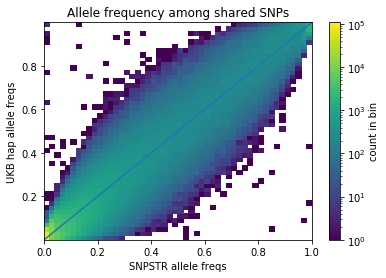

In [4]:
def graph_entire(title):
    graph_xs = xs[:variantCount]
    graph_ys = ys[:variantCount]
    #plt.hexbin(graph_xs, graph_ys, gridsize=100, cmap='viridis')
    fig, axes = plt.subplots()
    _, _, _, hist = axes.hist2d(graph_xs, graph_ys, bins=50, cmap='viridis', cmin=1, norm=colors.LogNorm())
    line = np.linspace(0, 1, 1000)
    fig.colorbar(hist, label='count in bin')
    axes.plot(line, line)
    axes.set_xlabel('SNPSTR allele freqs')
    axes.set_ylabel('UKB hap allele freqs')
    axes.set_title(title)
    plt.show()
graph_entire('Allele frequency among shared SNPs')

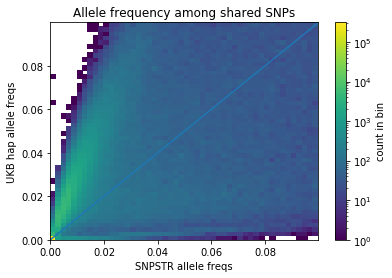

In [6]:
def graph_low_freq(title):
    graph_xs = xs[np.logical_and(xs <= 0.1, ys <= 0.1)][:variantCount]
    graph_ys = ys[np.logical_and(xs <= 0.1, ys <= 0.1)][:variantCount]
    #plt.hexbin(graph_xs, graph_ys, gridsize=100, cmap='viridis')
    fig, axes = plt.subplots()
    _, _, _, hist = axes.hist2d(graph_xs, graph_ys, bins=50, cmap='viridis', cmin=1, norm=colors.LogNorm())
    line = np.linspace(0, 0.1, 1000)
    fig.colorbar(hist, label='count in bin')
    axes.plot(line, line)
    axes.set_xlabel('SNPSTR allele freqs')
    axes.set_ylabel('UKB hap allele freqs')
    axes.set_title(title)
    plt.show()
graph_low_freq('Allele frequency among shared SNPs')

In [8]:
variantCount = 0
xs = np.zeros(1000000)
ys = np.zeros(1000000)

for cNum in range(1,23):
#for cNum in range(22,23):
    hapFreqs = loadFreqs("/projects/ps-gymreklab/jmargoli/ukbiobank/pre_imputation_qc/allele_freqs/hap_white_brit_high_quality_sane_kinship_unrelated",
                            "/projects/ps-gymreklab/jmargoli/ukbiobank/original/vcf_1_sample/hap", cNum, 6)
    snpstrFreqs = loadFreqs("/projects/ps-gymreklab/jmargoli/ukbiobank/pre_imputation_qc/allele_freqs/snpstr_eur",
                            "/projects/ps-gymreklab/jmargoli/ukbiobank/snpstr/vcf_1_sample", cNum, 11)
    commonKeys = set(snpstrFreqs.keys()).intersection(set(hapFreqs.keys()))
    for key in commonKeys:
        xs[variantCount] = snpstrFreqs[key]
        ys[variantCount] = hapFreqs[key]
        variantCount += 1

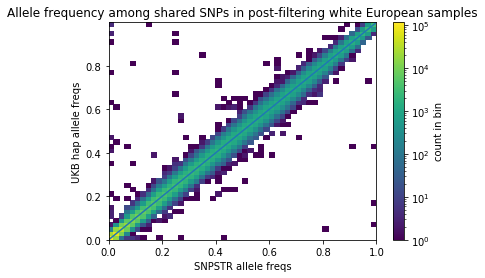

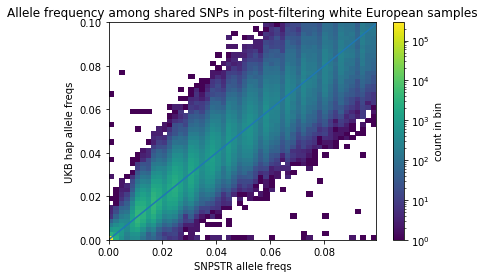

In [9]:
graph_entire('Allele frequency among shared SNPs in post-filtering white European samples')
graph_low_freq('Allele frequency among shared SNPs in post-filtering white European samples')